In [113]:
#  import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [82]:
# download some library which hold in nltk only first time
nltk.download('punkt') #punctuation
nltk.download('wordnet')#for lemmatization
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [83]:
#load and check data

In [84]:
# load data
df=pd.read_csv('/content/drive/MyDrive/Natural Language processing/reviews.csv')

In [85]:
# check top 5 records
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [87]:
# BASIC EDA & VISUALIZATION

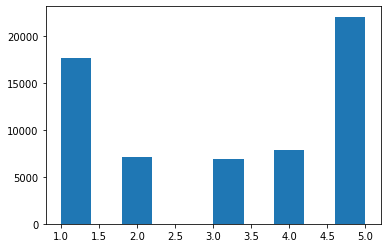

In [88]:
plt.hist(data=df,x='Rating')
plt.show()

In [89]:
# check missing values
df.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [90]:
df["Rating"].replace(1, value="negative",inplace=True)
df["Rating"].replace(2, value="negative",inplace=True)
df["Rating"].replace(3, value="neutral",inplace=True)
df["Rating"].replace(4, value="positive",inplace=True)
df["Rating"].replace(5, value="positive",inplace=True)
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",positive,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,positive,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",positive,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,negative,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,negative,1,NaN


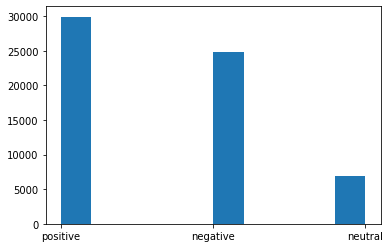

In [91]:
plt.hist(data=df,x='Rating')
plt.show()

In [92]:
# drop unwanted column
df.drop(['Time_submitted','Total_thumbsup','Reply'],axis=1,inplace=True)

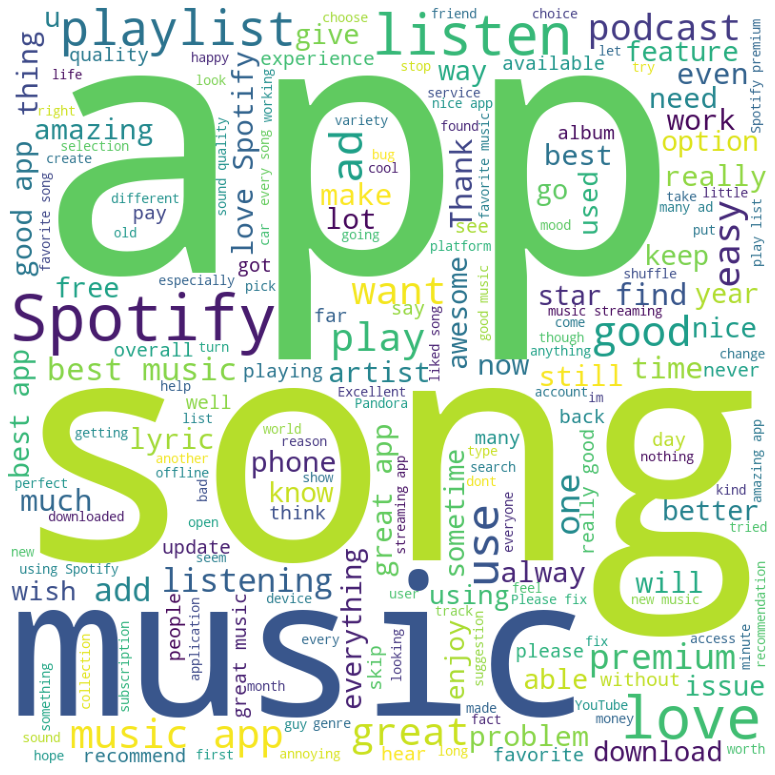

In [93]:
from wordcloud import STOPWORDS
# create wordcloud
# first create object of wordcloud class
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10,stopwords=STOPWORDS)
wc.generate(''.join(df[df['Rating']=='positive']['Review']))# for negative review
# wc.generate(''.join(df[df['Rating']=='negative']['review'])) #for positive review
# wc.generate(''.join(df[df['Rating']=='neutral']['review'])) #for neutal review
plt.figure(figsize=(14,14))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [94]:
# create a user define function for cleaning the message or text means 
# text preprocessing(text mining)
def clean_text(text):
  # first convert in lowercase
  text=text.lower()
  # second,apply word tokenize on text
  tokens=word_tokenize(text)
  #only keeps alphabets and remove special character and digits from given text
  word_tokens=[w for w in tokens if w.isalpha()]
  #remove stopwords
  # create list of inbuilt stopwords
  stop=stopwords.words('english')
  clean_tokens=[w for w in word_tokens if w not in stop]
  # create object of wordnetlemmatizer
  lemma=WordNetLemmatizer()
  lemma_tokens=[lemma.lemmatize(w) for w in clean_tokens]
  return ' '.join(lemma_tokens)

In [95]:
#call function in main program
df['Review']=df['Review'].apply(clean_text)
# inpput.apply(functionname)

In [96]:
df.head()

,Review,Rating
0,great music service audio high quality app eas...,positive
1,please ignore previous negative rating app sup...,positive
2,get best spotify experience android annoying p...,positive
3,really buggy terrible use recently,negative
4,dear spotify get song put playlist shuffle play,negative


In [97]:
# select input and output
x=df['Review']
y=df['Rating'] #target

In [98]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [106]:
# Label Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [123]:
# Character Level TF-IDF

In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(x_train)
x_train_tfidf = tfidf.transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [122]:
# Classification

In [112]:
# Random Forest - TF-IDF

In [111]:
rf2 = RandomForestClassifier()
rf2.fit(x_train_tfidf, y_train)
rf_tfidf = rf2.score(x_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF Vectors: {rf_tfidf}')

Random Forest Classifier on TF-IDF Vectors: 0.7460832859810049


In [121]:
# MultinomialNB - TF-IDF

In [115]:
mnb2 = MultinomialNB()
mnb2.fit(x_train_tfidf, y_train)
mnb_tfidf = mnb2.score(x_test_tfidf, y_test)
print(f'Multinomial Naive Bayes Classifier on TF-IDF Vectors: {mnb_tfidf}')

Multinomial Naive Bayes Classifier on TF-IDF Vectors: 0.7478691452228265


In [116]:
# Model Results

In [118]:
model = {'Model':['RandomForestClassifier-TFIDFVectors',
                  'MultinomialNBClassifier-TFIDFVectors'],
         'Score':[rf_tfidf,mnb_tfidf]
         }
model_df = pd.DataFrame(model)         
model_df

,Model,Score
0,RandomForestClassifier-TFIDFVectors,0.746083
1,MultinomialNBClassifier-TFIDFVectors,0.747869


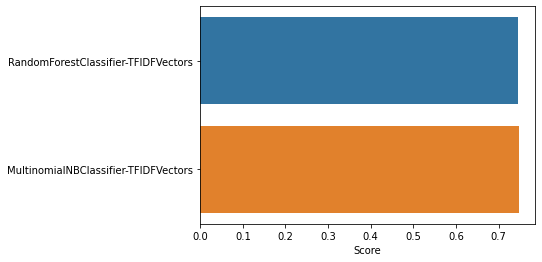

In [120]:
import seaborn as sns 
sns.barplot(data=model_df, y='Model', x='Score')
plt.ylabel('')
plt.show()